# Clustering examples

## Uniform 2D samples

Let's start with generating 1000 points randomly on a plane, then see what various algorithm will find.

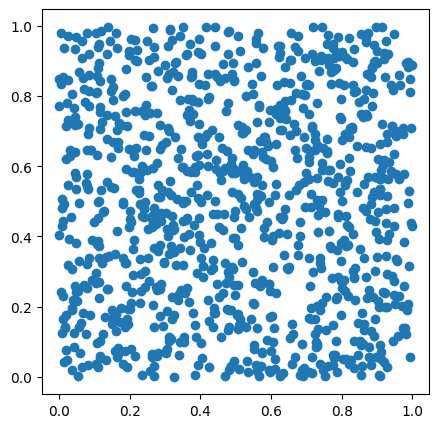

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Ncl = 5

xx = np.random.rand(1000, 2)
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(xx[:, 0], xx[:, 1])


For instance, we can see that with k-means clustering we obtain very different results, due to the randomness of both points and initial centroids.

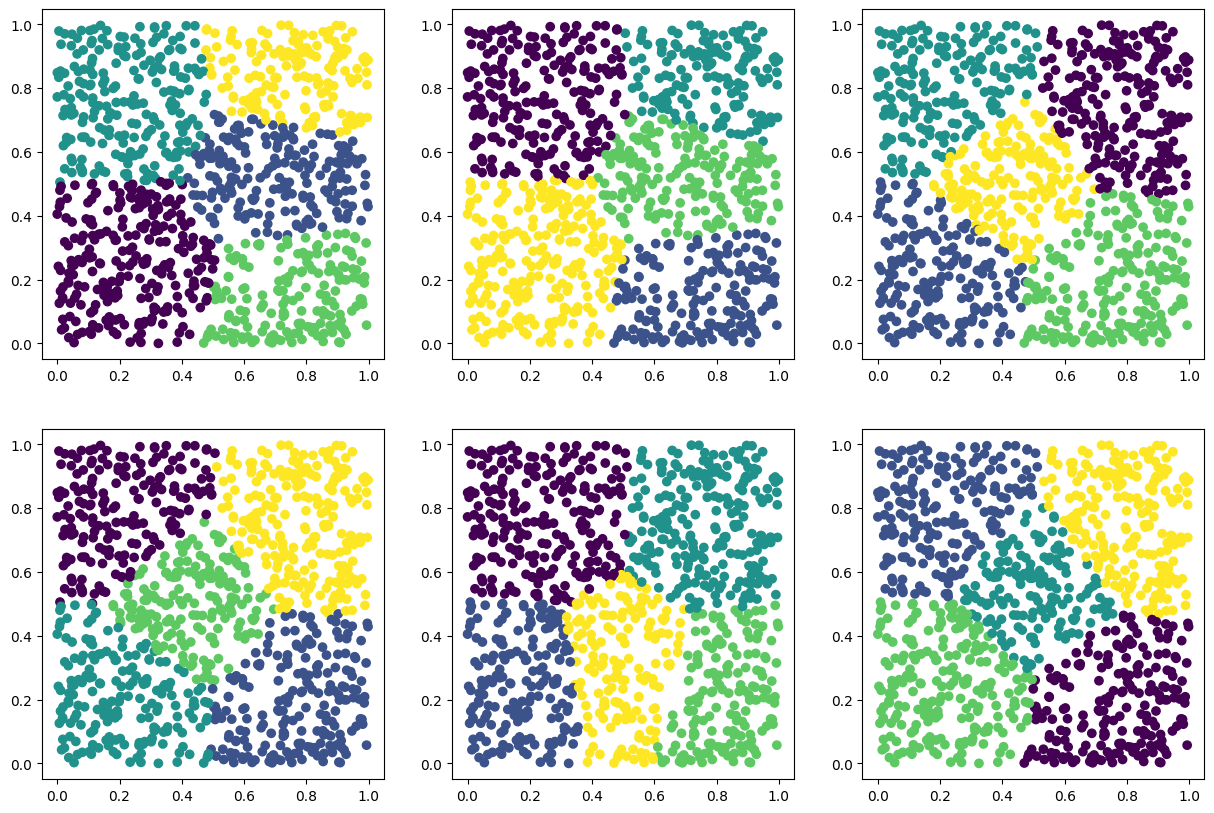

In [2]:
from sklearn.cluster import KMeans

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i in range(6):
    kmeans = KMeans(n_clusters=Ncl, max_iter=10, n_init='auto').fit(xx)
    ax[i//3, i % 3].scatter(xx[:, 0], xx[:, 1], c=kmeans.labels_)


On the other hand, we can see how DB scan is able to recognize the randomness of such points as noise.


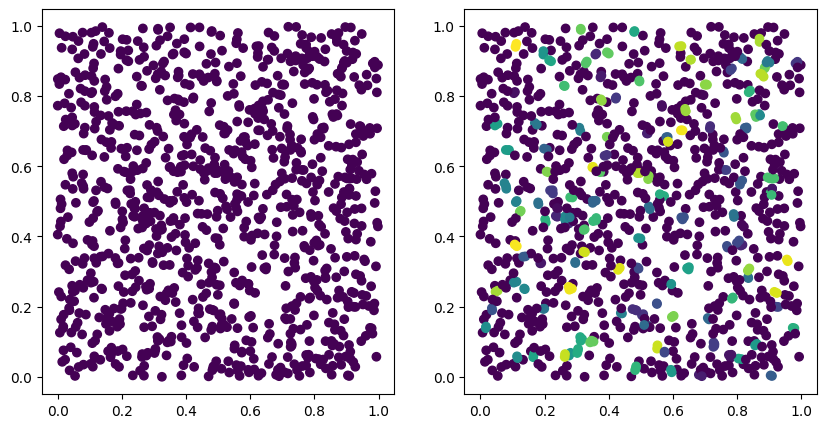

In [3]:
from sklearn.cluster import DBSCAN

Np = 1000

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

DBlbl = DBSCAN(eps=0.001, min_samples=5).fit_predict(xx)
ax[0].scatter(xx[:, 0], xx[:, 1], c=DBlbl)

DBlbl = DBSCAN(eps=0.01, min_samples=2).fit_predict(xx)
ax[1].scatter(xx[:, 0], xx[:, 1], c=DBlbl)


## Multiple clusters

In [4]:
fp = './data/birch2_sineCurve.txt'


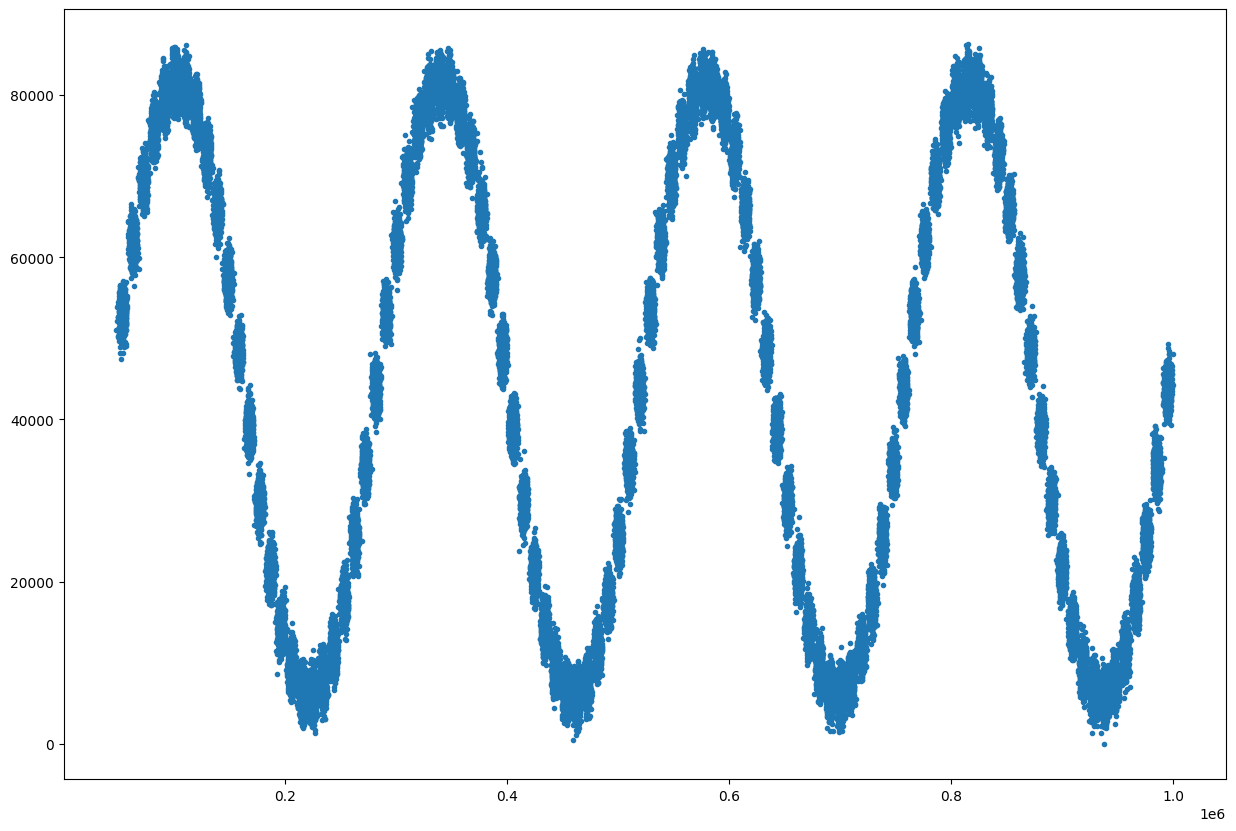

In [5]:
import numpy as np

with open(fp) as file:
    cc = np.array([line.split() for line in file], dtype=np.float64)

from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(cc[:, 0], cc[:, 1], marker='.')


Let's see what happens by applying k-means clustering.

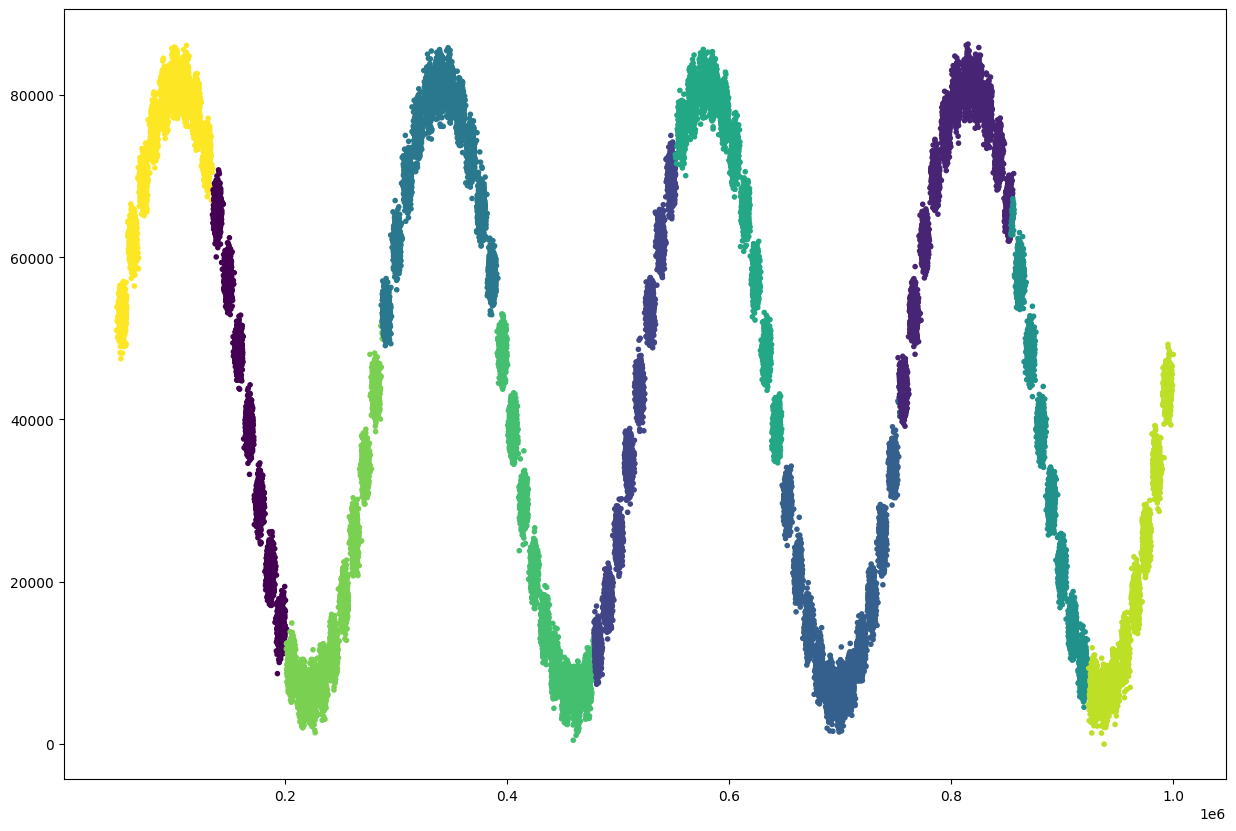

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=11, max_iter=10, n_init='auto')
KMlbl = kmeans.fit_predict(cc)

fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(cc[:, 0], cc[:, 1], c=KMlbl, marker='.')


One may also try incrementing the number of clusters until the right number is found... that's quite inefficient.

As before we can also try DBscan.

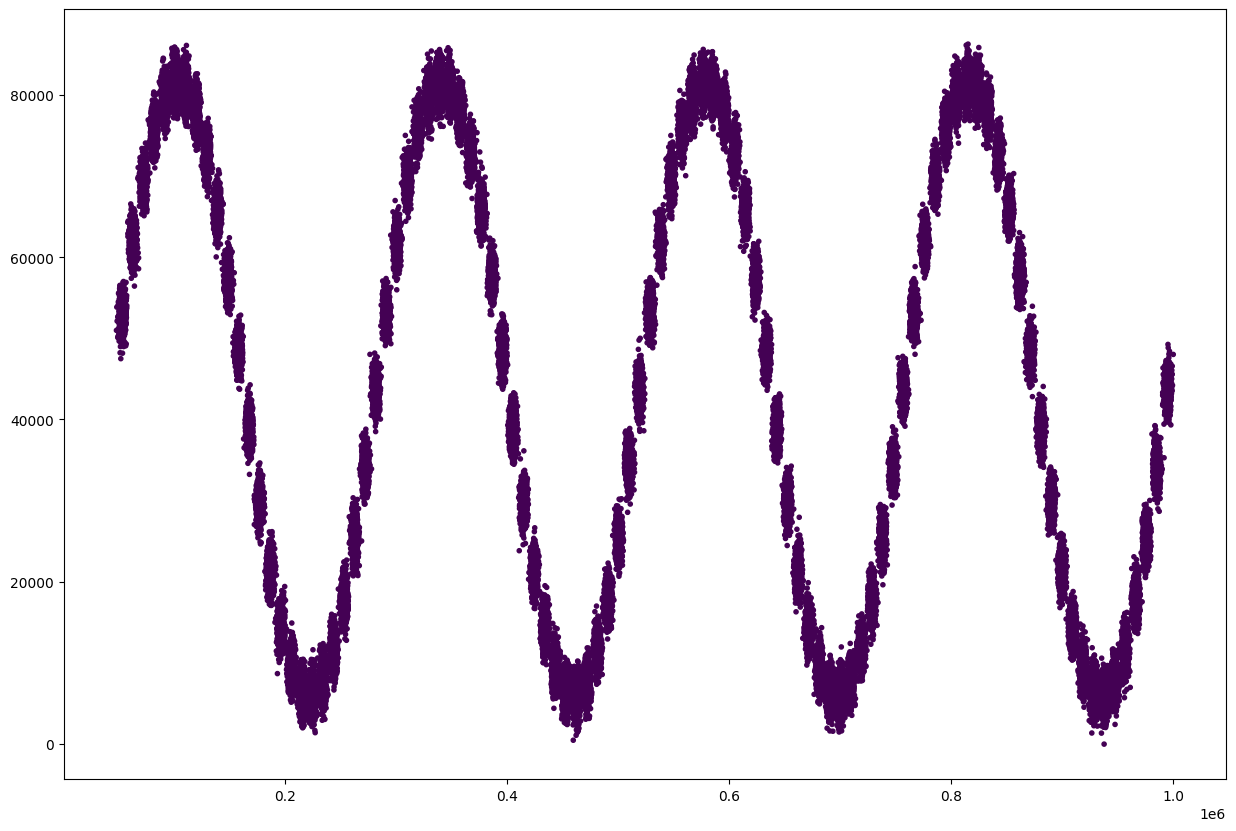

In [7]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=10000, min_samples=20)
DBlbl = dbscan.fit_predict(cc)

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(cc[:, 0], cc[:, 1], c=DBlbl, marker='.')


He found only one cluster... why?
Maybe we have to reduce the neighborhood radius $\epsilon$.
By decreasing both the parameters we get the clusters, but with a lot of noise.

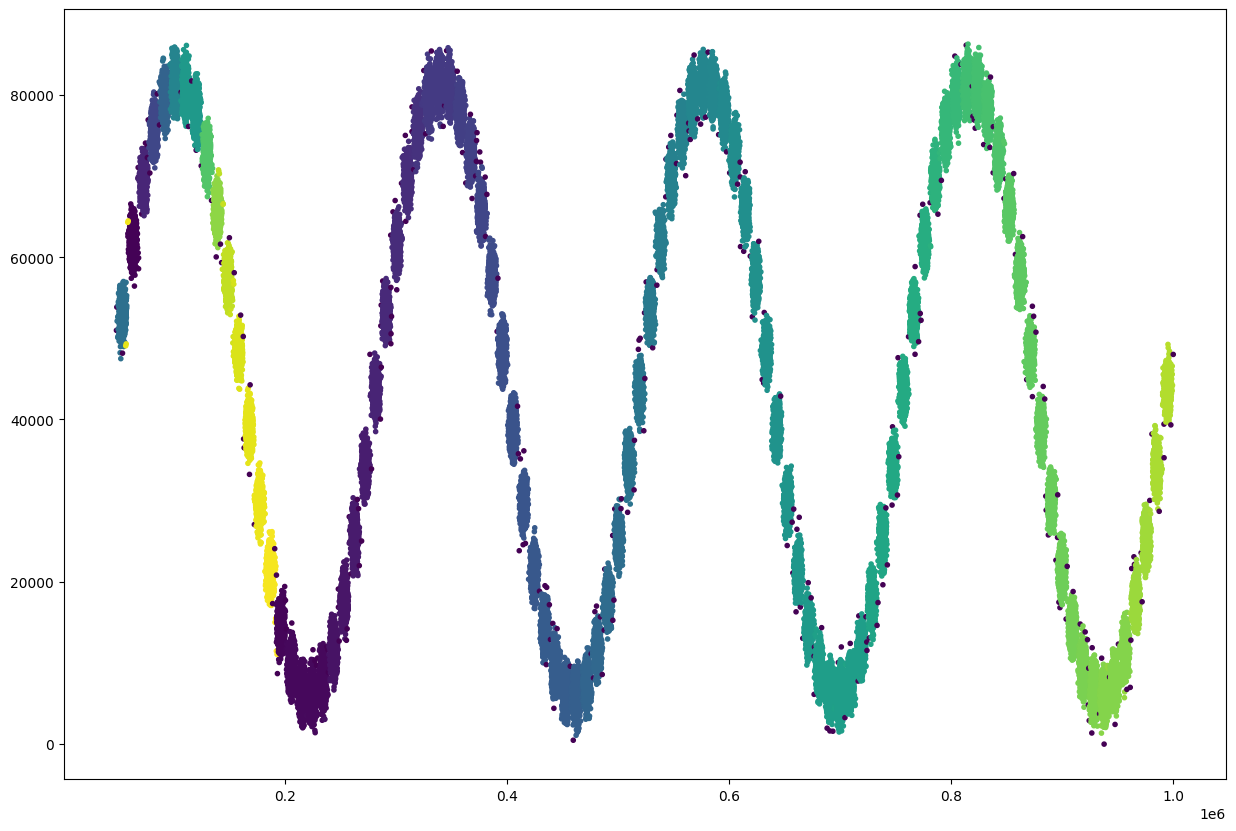

In [8]:
dbscan = DBSCAN(eps=1000, min_samples=2)
DBlbl = dbscan.fit_predict(cc)

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(cc[:, 0], cc[:, 1], c=DBlbl, marker='.')


## Nested circles

Now we try to cluster two circles nested together.
Let's first generate the circles.

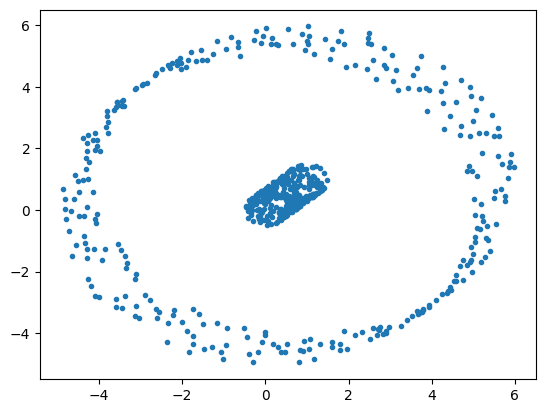

In [9]:
from matplotlib import pyplot as plt
import numpy as np

N = 300  # size of each cluster
r1 = 0.5  # radius of the inner circle
r2 = 5  # radius of the outer circle
theta = np.linspace(0, 2*np.pi, N)

X1 = np.dot(r1, np.array([np.cos(theta), np.sin(theta)])) + np.random.rand(N)
X2 = r2*np.array([np.cos(theta), np.sin(theta)]) + np.random.rand(N)

X = np.concatenate((X1, X2), axis=1)  # dataset
X = X.T


plt.scatter(X[:, 0], X[:, 1], marker='.')


Let's apply the previous clustering algorithms.

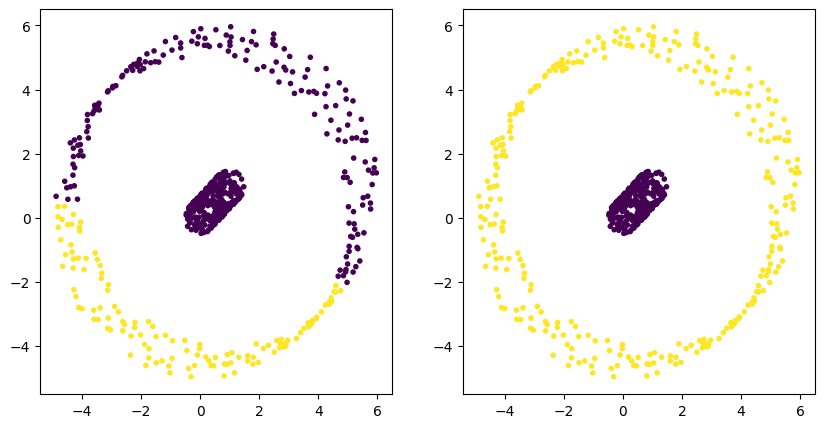

In [10]:
from sklearn.cluster import KMeans, DBSCAN

kmeans = KMeans(n_clusters=2, n_init='auto')
KMlbl = kmeans.fit_predict(X)
dbscan = DBSCAN(eps=1, min_samples=5)
DBlbl = dbscan.fit_predict(X)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].scatter(X[:, 0], X[:, 1], c=KMlbl, marker='.')
ax[1].scatter(X[:, 0], X[:, 1], c=DBlbl, marker='.')


As we can see, while k-means clustering applied a straight cut in the plane, DBscan was able to isolate the two clusters.